In [1]:
import data_loader as d_load

# Загрузка датасета
file_path = 'nyc-east-river-bicycle-counts.csv'
data = d_load.load_data_csv(file_path)

Файл nyc-east-river-bicycle-counts.csv загружен


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           210 non-null    int64  
 1   Date                 210 non-null    object 
 2   Day                  210 non-null    object 
 3   High Temp (°F)       210 non-null    float64
 4   Low Temp (°F)        210 non-null    float64
 5   Precipitation        210 non-null    object 
 6   Brooklyn Bridge      210 non-null    float64
 7   Manhattan Bridge     210 non-null    int64  
 8   Williamsburg Bridge  210 non-null    float64
 9   Queensboro Bridge    210 non-null    float64
 10  Total                210 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 18.2+ KB


In [3]:
import data_preprocessing as d_pre

d_pre.preproc_cnt_null(data)
d_pre.preproc_cnt_duplicates(data)
data = d_pre.preproc_fill(data)

Пропусков нет
Количество полностью совпадающих строк: 0
Столбцы Unnamed, Date, Day удалены
Столбец Precipitation преобразован
Пропуски заполнены


/content/data_preprocessing.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   High Temp (°F)       210 non-null    float64
 1   Low Temp (°F)        210 non-null    float64
 2   Precipitation        210 non-null    float64
 3   Brooklyn Bridge      210 non-null    float64
 4   Manhattan Bridge     210 non-null    int64  
 5   Williamsburg Bridge  210 non-null    float64
 6   Queensboro Bridge    210 non-null    float64
 7   Total                210 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 13.3 KB


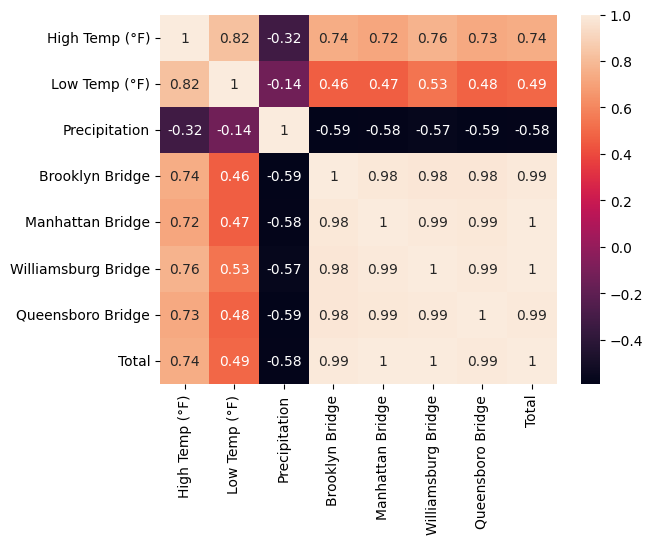

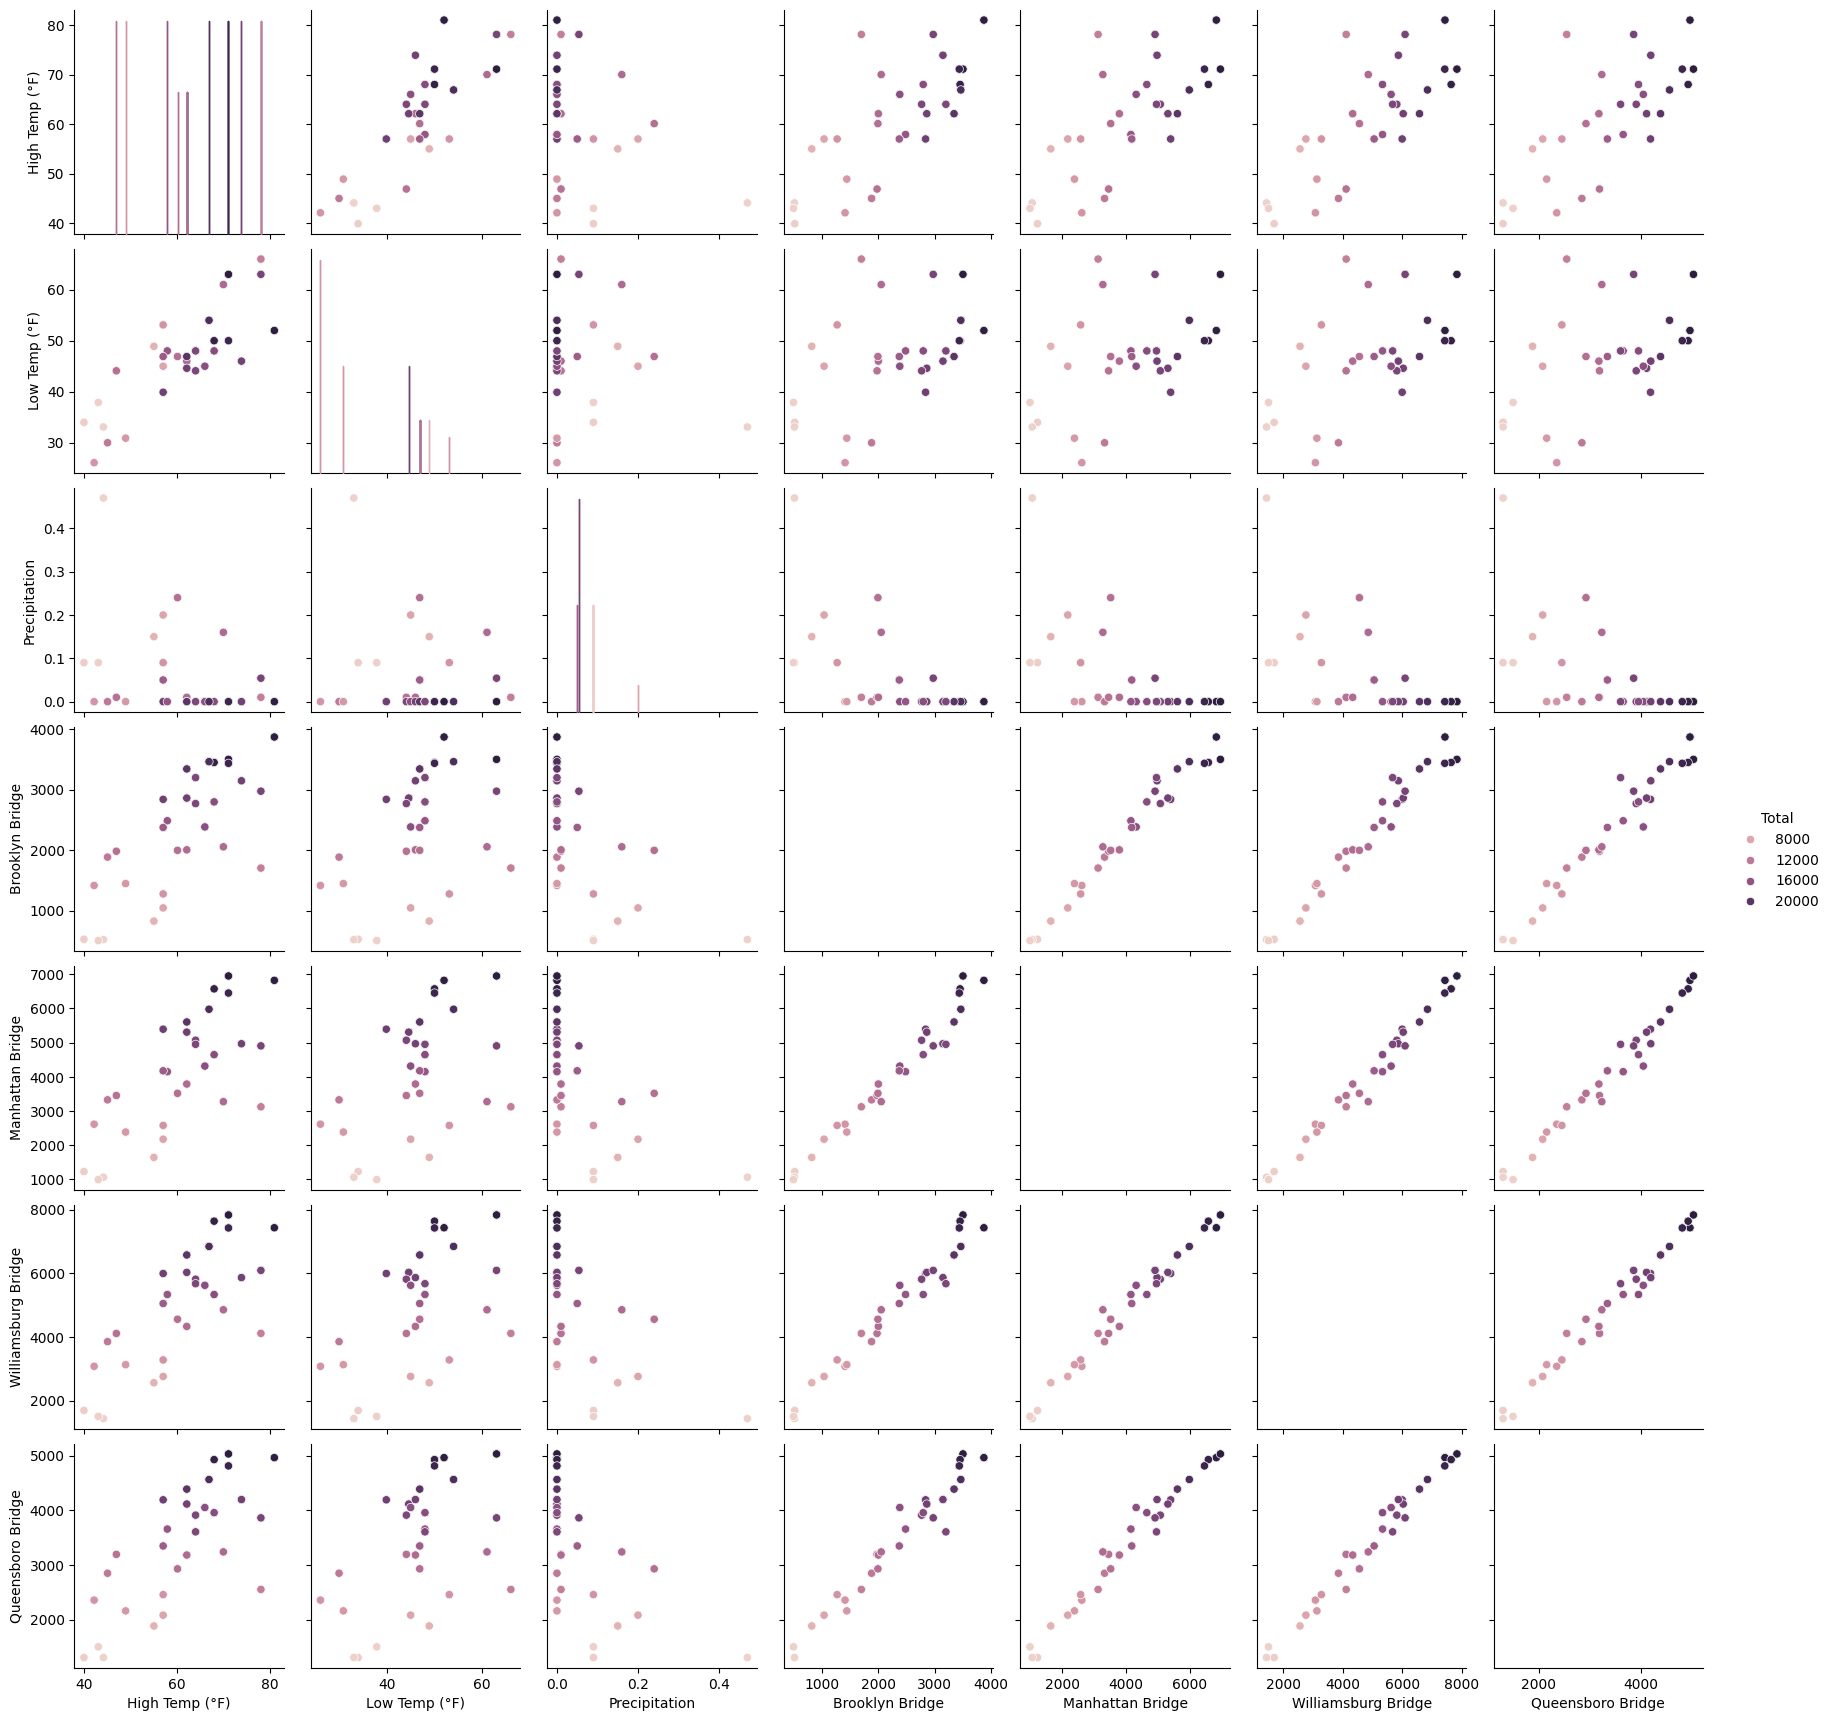

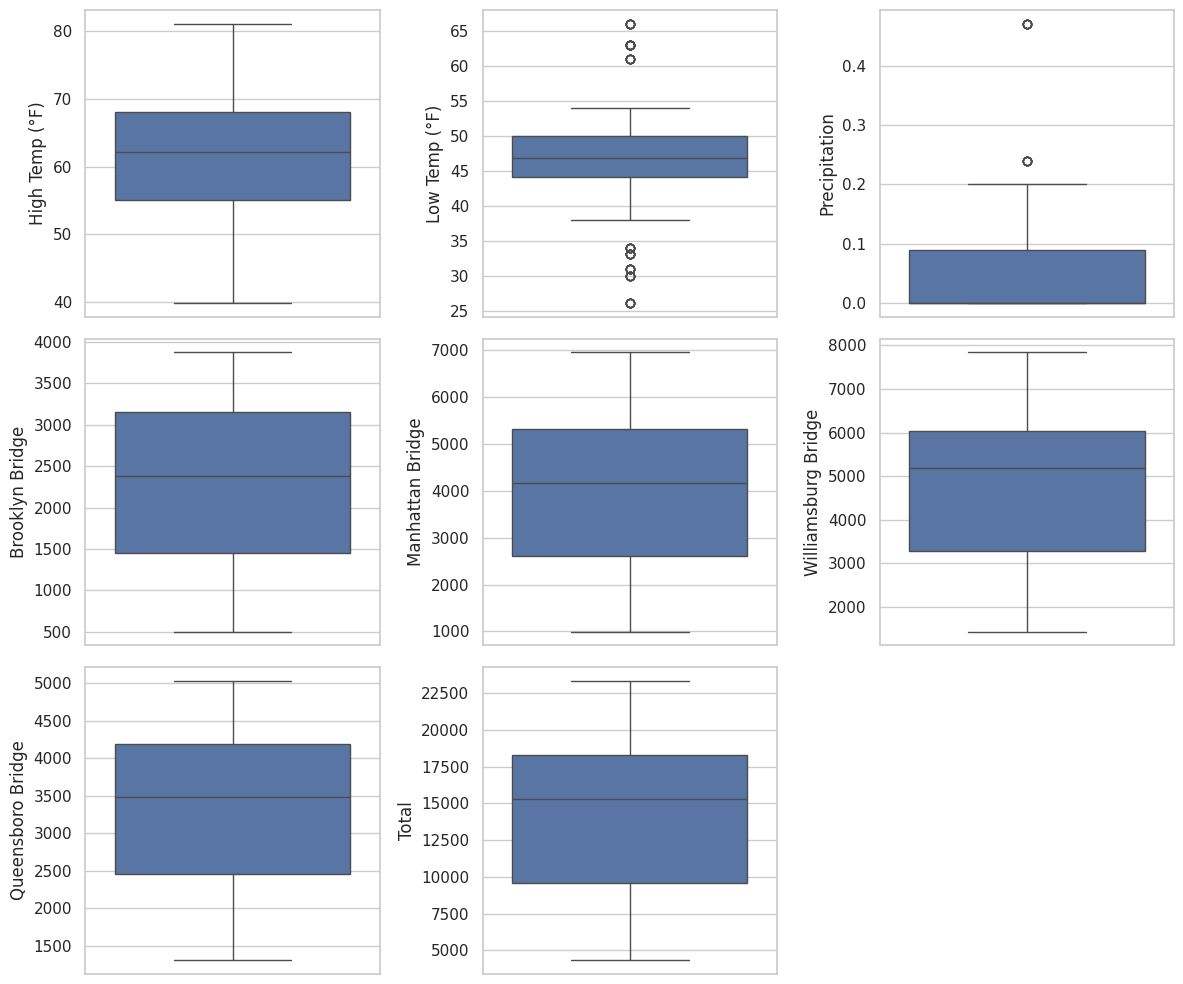

In [5]:
import data_visualisation as d_vis

d_vis.vis_matrix_corr(data)
d_vis.pairplot(data)
d_vis.boxplot(data)
d_vis.all_value_praph(data)

In [6]:
X= data.drop(['Total'],axis=1)
y=data['Total']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Model = LinearRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
print(f'MSE Среднеквадратическая ошибка: {MSE}')

r2 = r2_score(y_test, y_pred)
print(f'Коэффициент детерминации: {r2}')


MSE Среднеквадратическая ошибка: 2.1743033244251012e-23
Коэффициент детерминации: 1.0


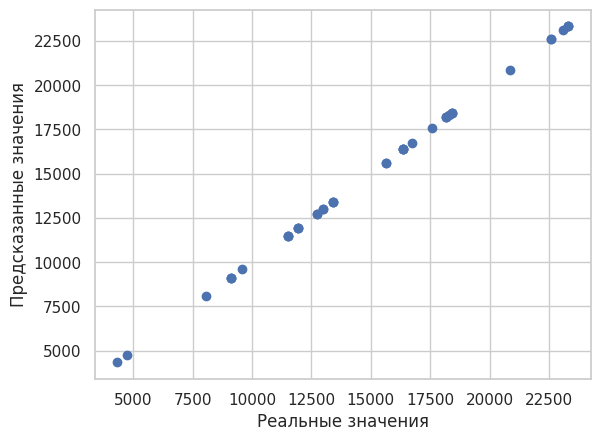

In [8]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.show()